# Regression Lineal

Las técnicas de aprendizaje automático supervisado implican entrenar un modelo para operar en un conjunto de características y predecir una etiqueta utilizando un conjunto de datos que incluye algunos valores de etiqueta ya conocidos. El proceso de entrenamiento ajusta las características a las etiquetas conocidas para definir una función general que se puede aplicar a las nuevas características para las que las etiquetas son desconocidas y predecirlas. Puede pensar en esta función de esta manera, en la que **y** representa la etiqueta que queremos predecir y **x** representa las características que usa el modelo para predecirlo.

$$y = f(x)$$

En la mayoría de los casos, **x** es en realidad un **vector** que consta de múltiples valores de características, por lo que, para ser un poco más precisos, la función podría expresarse así:

$$y = f([x_1, x_2, x_3, ...])$$

El objetivo de entrenar el modelo es encontrar una función que realice algún tipo de cálculo de los valores **x** que produzca el resultado **y**. Hacemos esto aplicando un **algoritmo** de aprendizaje automático que intenta ajustar los valores **x** a un cálculo que produce **y** con una precisión razonable para todos los casos en el conjunto de datos de entrenamiento.

Hay muchos algoritmos de aprendizaje automático para el aprendizaje supervisado y se pueden dividir en dos tipos:

- **Algoritmos de regresión**: Algoritmos que predicen un valor **y** que es un valor numérico, como el precio de una casa o el número de transacciones de venta.
- **Algoritmos de clasificación**: Algoritmos que predicen a qué categoría, o **clase**, pertenece una observación. El valor **y** en un modelo de clasificación es un vector de valores de probabilidad entre 0 y 1, uno para cada clase, que indica la probabilidad de que la observación pertenezca a cada clase.

> **Citation**: The data used in this exercise is derived from [Capital Bikeshare](https://www.capitalbikeshare.com/system-data) and is used in accordance with the published [license agreement](https://www.capitalbikeshare.com/data-license-agreement).
<br>
<br>
<img src="./images/LR.png" height = "500" width = "500">

## Estimacion de Parametros por minimos cuadrados
<br>
<img src="./images/minimos.png" height = "500" width = "500">

- Link de interes: https://www.youtube.com/watch?v=k964_uNn3l0&list=PL-Ogd76BhmcC_E2RjgIIJZd1DQdYHcVf0&index=5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_data = pd.read_csv("./datasets/daily-bike-share.csv")
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [19]:
X = bike_data["temp"].values
Y = bike_data["rentals"].values

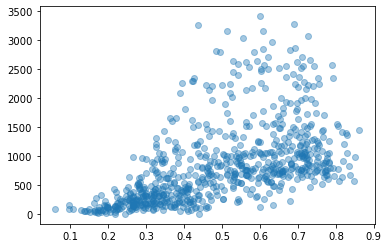

In [6]:
plt.scatter(X, Y, alpha = 0.4)

In [12]:
X = np.array([np.ones(len(X)), X]).T
X

array([[1.      , 0.344167],
       [1.      , 0.363478],
       [1.      , 0.196364],
       ...,
       [1.      , 0.253333],
       [1.      , 0.255833],
       [1.      , 0.215833]])

In [14]:
B = np.linalg.inv(X.T @ X) @ X.T @ Y

In [16]:
b0 = B[0]
b1 = B[1]

print("b0:",b0)
print("b1:",b1)

b0: -161.34611023081422
b1: 2037.8554292264646


In [18]:
temp = 0.5
predecir_alquiler = b0 + temp*b1
print(f"alquiler = {predecir_alquiler}" )

alquiler = 857.581604382418


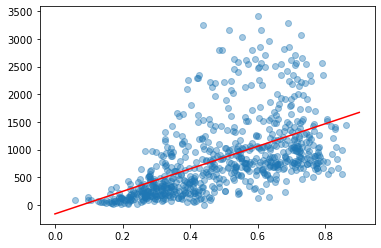

In [22]:
X = bike_data["temp"].values
Y = bike_data["rentals"].values

b0 = B[0]
b1 = B[1]

puntos_x = [0, 0.9]
puntos_y = [b0 + puntos_x[0]*b1, b0 + puntos_x[1]*b1]

plt.scatter(X, Y, alpha = 0.4)
plt.plot(puntos_x, puntos_y, c = "r")

In [24]:
print(f"Y: {b0} + {b1}*temp")

Y: -161.34611023081422 + 2037.8554292264646*temp
